# **`Dog Breed Prediction`**

Installing Kaggle and loading dataset from kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [ ]:
!kaggle datasets list -s dogbreedidfromcomp

401 - Unauthorized - Unauthenticated


In [ ]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp

 99% 681M/691M [00:11<00:00, 111MB/s]
100% 691M/691M [00:11<00:00, 64.6MB/s]


In [ ]:
!unzip dogbreedidfromcomp.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam


In [ ]:
labels_all = pd.read_csv("/content/dog_dataset/labels.csv")
print(labels_all.shape)
labels_all.head

(10222, 2)


<bound method NDFrame.head of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>

In [ ]:
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: count, dtype: int64

In [ ]:
CLASS_NAMES = ['doberman','german_shepherd','golden_retriever','great_dane','labrador','pomeranian','pug','rottweiler','saint_bernard','siberian_husky','poodle']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
1,20,008b1271ed1addaccf93783b39deab45,doberman
2,25,00a366d4b4a9bbb6c8a63126697b7656,golden_retriever
3,37,0100f55e4f0fe28f2c0465d3fc4b9897,golden_retriever
4,60,016bcdb05e2d0e0878877df21b8c3cff,german_shepherd


In [ ]:
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')

Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

for i in tqdm(range(len(labels))):
  img = image.load_img('/content/dog_dataset/train/%s.jpg' % labels['id'][i], target_size=(224,224))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy(), axis=0)
  X_data[i] = x / 255.0

  print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
  print('One -hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

  4%|▍         | 28/745 [00:00<00:02, 259.21it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 12%|█▏        | 93/745 [00:00<00:02, 306.15it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 22%|██▏       | 161/745 [00:00<00:01, 321.46it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 30%|███       | 226/745 [00:00<00:01, 317.24it/s]

(745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,3

 39%|███▉      | 291/745 [00:00<00:01, 317.79it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 48%|████▊     | 355/745 [00:01<00:01, 315.30it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 56%|█████▌    | 418/745 [00:01<00:01, 292.20it/s]

  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Trai

 65%|██████▍   | 481/745 [00:01<00:00, 300.95it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 73%|███████▎  | 546/745 [00:01<00:00, 311.52it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 82%|████████▏ | 609/745 [00:01<00:00, 298.52it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 90%|█████████ | 672/745 [00:02<00:00, 305.34it/s]


Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded out

 98%|█████████▊| 733/745 [00:02<00:00, 292.57it/s]



Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded ou

100%|██████████| 745/745 [00:02<00:00, 302.05it/s]

(745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,360
One -hot encoded output shape:  (745, 11)  size: 8,195

Train Images shape:  (745, 224, 224, 3)  size: 112,143,3

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu' , input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation = 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation = 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu" ))
model.add(Dense(64, activation = "relu" ))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 16)       

In [ ]:
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)


In [ ]:
epochs = 100
batch_size = 100

history = model.fit(
    X_train,
    Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, Y_val))

Epoch 1/100
6/6 [==============================] - 12s 2s/step - loss: 2.4028 - accuracy: 0.0877 - val_loss: 2.3869 - val_accuracy: 0.0746
Epoch 2/100
6/6 [==============================] - 10s 2s/step - loss: 2.3731 - accuracy: 0.1101 - val_loss: 2.3632 - val_accuracy: 0.1194
Epoch 3/100
6/6 [==============================] - 10s 2s/step - loss: 2.3403 - accuracy: 0.1325 - val_loss: 2.3240 - val_accuracy: 0.1194
Epoch 4/100
6/6 [==============================] - 10s 2s/step - loss: 2.2980 - accuracy: 0.1325 - val_loss: 2.2910 - val_accuracy: 0.1194
Epoch 5/100
6/6 [==============================] - 10s 2s/step - loss: 2.2615 - accuracy: 0.1325 - val_loss: 2.2506 - val_accuracy: 0.1194
Epoch 6/100
6/6 [==============================] - 10s 2s/step - loss: 2.2164 - accuracy: 0.1343 - val_loss: 2.2072 - val_accuracy: 0.1418
Epoch 7/100
6/6 [==============================] - 10s 2s/step - loss: 2.1691 - accuracy: 0.1810 - val_loss: 2.1708 - val_accuracy: 0.1493
Epoch 8/100
6/6 [==========

In [ ]:
Y_pred = model.predict(X_data)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n', round((score[1]*100), 2), '%')

3/3 [==============================] - 0s 77ms/step - loss: 4.4917 - accuracy: 0.3333
Accuracy over the test set: 
 33.33 %


Originally :  pug
Predicted :  golden_retriever


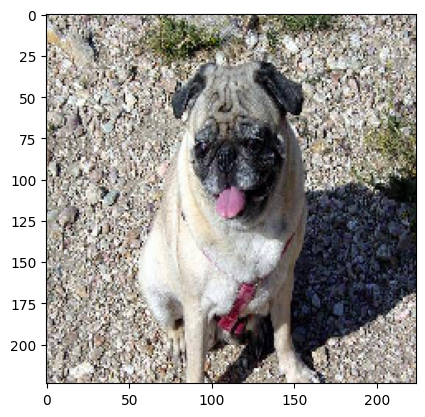

In [ ]:
plt.imshow(X_test[1,:,:,:])
plt.show

print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

In [ ]:
model.save("dog_test_class.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
